In [1]:
# TODO, show how different aggression configurations impact results
from qiskit.transpiler import CouplingMap
from mirror_gates.pass_managers import SabreMS, QiskitLevel3
from transpile_benchy.metrics.abc_metrics import MetricInterface
from transpile_benchy.metrics.gate_counts import DepthMetric
from mirror_gates.utilities import DoNothing

In [2]:
from transpile_benchy.library import CircuitLibrary

library = CircuitLibrary.from_txt("../medium_circuits.txt")
# library = CircuitLibrary.from_txt("qft.txt")

In [3]:
coupling_map = CouplingMap.from_heavy_hex(5)
transpilers = [
    QiskitLevel3(coupling_map),
    SabreMS(coupling_map, name="SABREMS-a0", fixed_aggression=0),
    SabreMS(coupling_map, name="SABREMS-a1", fixed_aggression=1),
    SabreMS(coupling_map, name="SABREMS-a2", fixed_aggression=2),
    SabreMS(coupling_map, name="SABREMS-a3", fixed_aggression=3),
]

metrics = [DepthMetric(consolidate=False)]

In [4]:
from transpile_benchy.benchmark import Benchmark

# only interested in TimeMetric, is there by default
benchmark = Benchmark(
    transpilers=transpilers,
    circuit_library=library,
    metrics=metrics,
    num_runs=1,
)
benchmark.run()

Percent volume of A_C2	 | Cost	 | Sequence name
  0.00% =    0/1    	 | 0.00	 | 
  0.00% =    0/1    	 | 0.50	 | xx_plus_yy(-1.57080)
 50.00% =    1/2    	 | 1.00	 | xx_plus_yy(-1.57080).xx_plus_yy(-1.57080)
100.00% =    1/1    	 | 1.50	 | xx_plus_yy(-1.57080).xx_plus_yy(-1.57080).xx_plus_yy(-1.57080)


Circuits from library:   0%|          | 0/17 [00:00<?, ?it/s]

Loading dnn_n16 from QASMBench


Circuits from library:   6%|▌         | 1/17 [00:25<06:55, 26.00s/it]

Loading cat_state_n22 from QASMBench


Circuits from library:  12%|█▏        | 2/17 [00:27<02:57, 11.83s/it]

Loading ghz_state_n23 from QASMBench


Circuits from library:  18%|█▊        | 3/17 [00:30<01:44,  7.46s/it]

Loading bv_n14 from QASMBench


Circuits from library:  24%|██▎       | 4/17 [00:45<02:16, 10.52s/it]

Loading wstate_n27 from MQTBench


Circuits from library:  29%|██▉       | 5/17 [00:48<01:36,  8.00s/it]

Loading qec9xz_n17 from QASMBench


Circuits from library:  35%|███▌      | 6/17 [01:10<02:18, 12.59s/it]

Loading bv_n19 from QASMBench


Circuits from library:  41%|████      | 7/17 [01:30<02:28, 14.88s/it]

Loading multiply_n13 from QASMBench


Circuits from library:  47%|████▋     | 8/17 [01:48<02:25, 16.17s/it]

Loading seca_n11 from QASMBench


Circuits from library:  53%|█████▎    | 9/17 [02:14<02:31, 18.98s/it]

Loading qram_n20 from QASMBench


Circuits from library:  59%|█████▉    | 10/17 [02:40<02:29, 21.42s/it]

Loading knn_n25 from QASMBench


Circuits from library:  65%|██████▍   | 11/17 [03:08<02:19, 23.29s/it]

Loading swap_test_n25 from QASMBench


Circuits from library:  71%|███████   | 12/17 [03:36<02:03, 24.67s/it]

Loading bigadder_n18 from QASMBench


Circuits from library:  76%|███████▋  | 13/17 [04:05<01:44, 26.17s/it]

Loading qf21_n15 from QASMBench


Circuits from library:  82%|████████▏ | 14/17 [04:32<01:19, 26.35s/it]

Loading multiplier_n15 from QASMBench


Circuits from library:  88%|████████▊ | 15/17 [05:18<01:04, 32.07s/it]

Loading qft_n18 from QASMBench


Circuits from library:  94%|█████████▍| 16/17 [06:06<00:37, 37.00s/it]

Loading sat_n11 from QASMBench


Circuits from library: 100%|██████████| 17/17 [06:49<00:00, 24.09s/it]


In [5]:
print(benchmark.summary_statistics(transpilers[0], transpilers[1])["monodromy_depth"])
print(benchmark.summary_statistics(transpilers[0], transpilers[2])["monodromy_depth"])
print(benchmark.summary_statistics(transpilers[0], transpilers[3])["monodromy_depth"])
print(benchmark.summary_statistics(transpilers[0], transpilers[4])["monodromy_depth"])

{'average_change': 1.1540680058460404, 'best_circuit': 'dnn_n16', 'worst_circuit': 'bv_n19'}
{'average_change': -3.818366075649085, 'best_circuit': 'sat_n11', 'worst_circuit': 'dnn_n16'}
{'average_change': -9.52250486681903, 'best_circuit': 'qft_n18', 'worst_circuit': 'bv_n19'}
{'average_change': -0.5965575900626806, 'best_circuit': 'qft_n18', 'worst_circuit': 'knn_n25'}


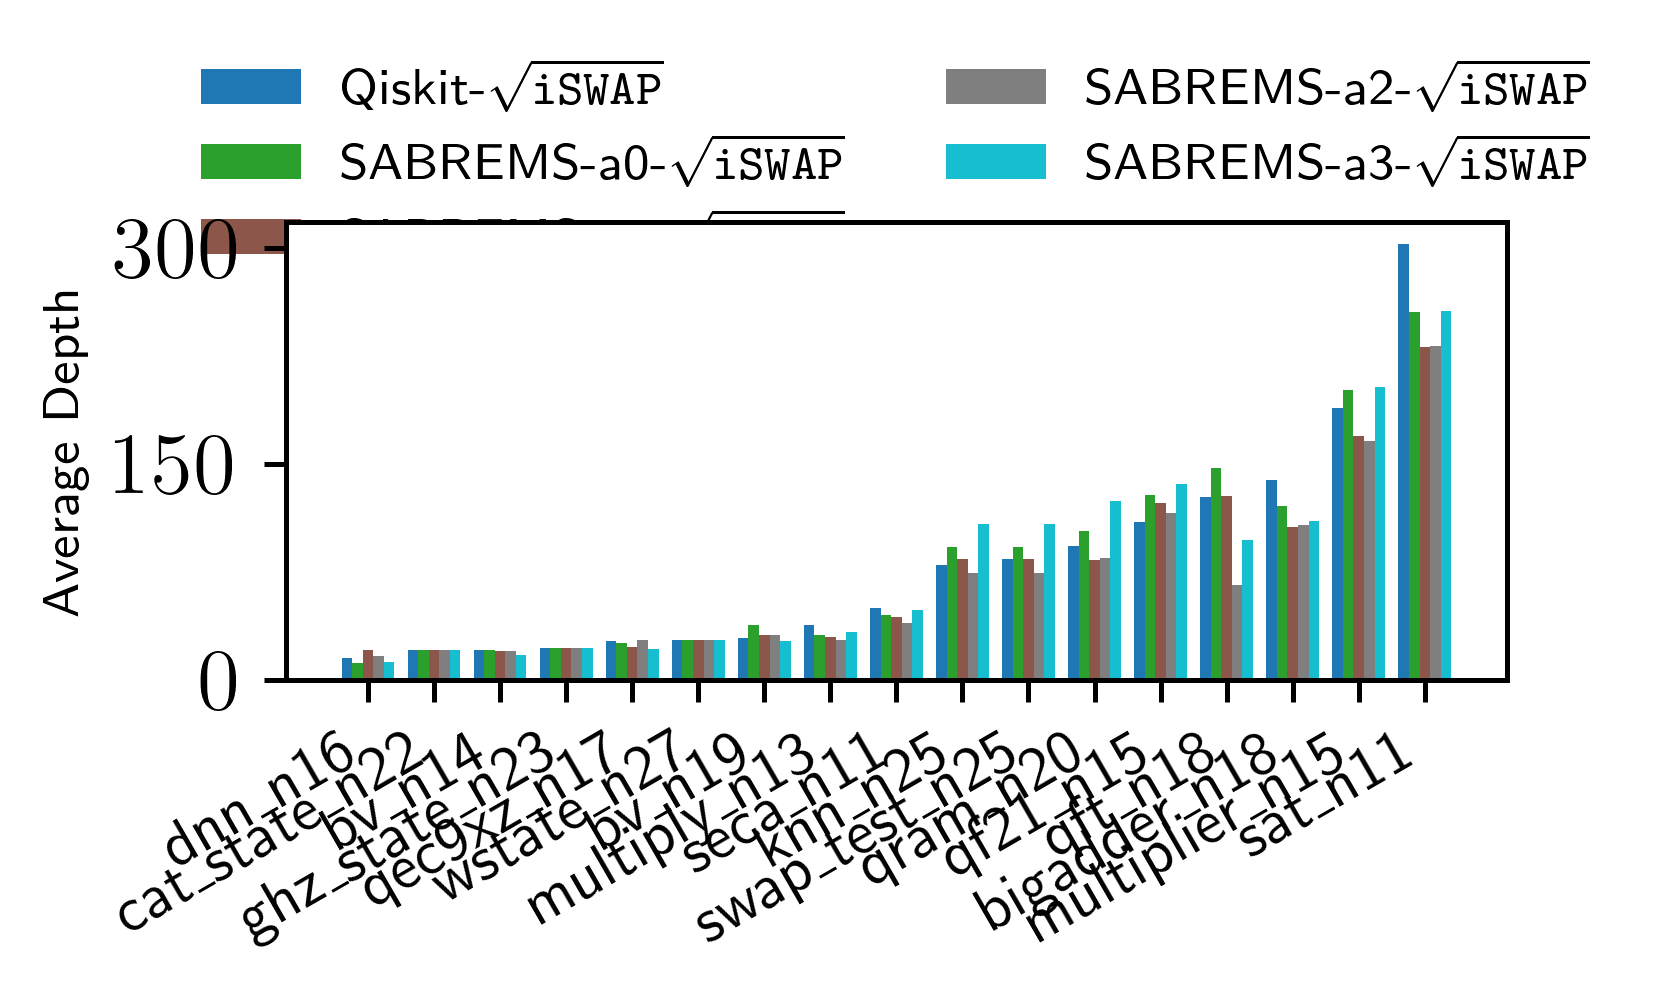

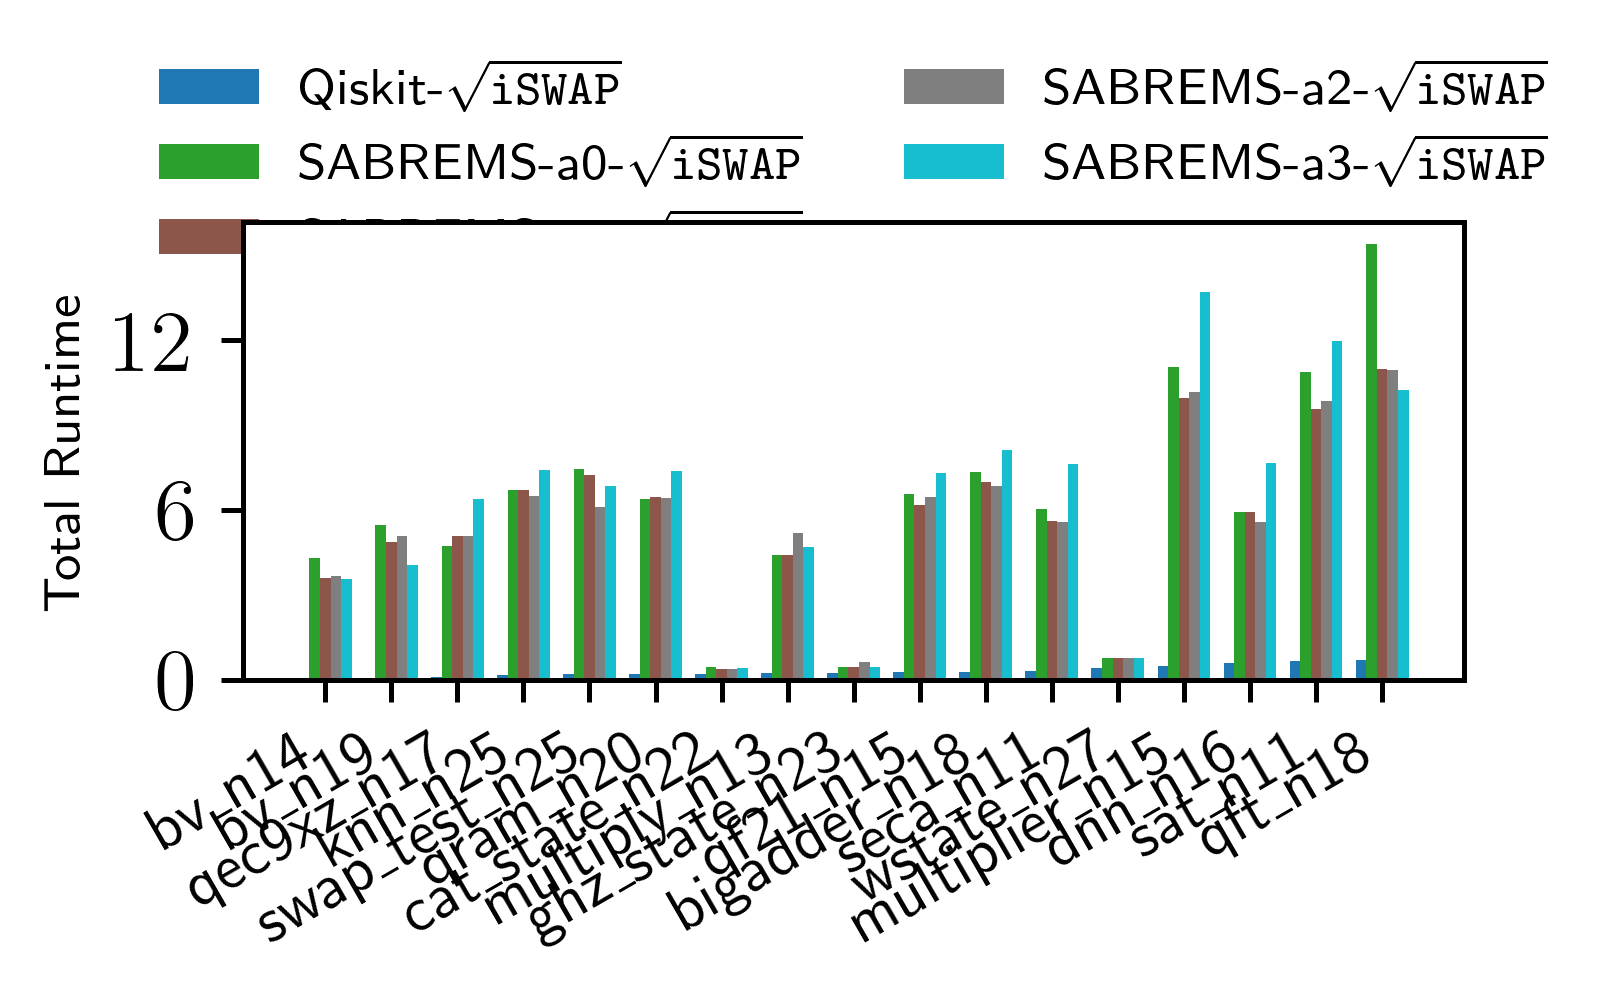

In [6]:
from transpile_benchy.render import plot_benchmark

plot_benchmark(benchmark, save=0, legend_show=1, filename="aggression")

In [ ]:
# TODO
# keep same total effort
# layout trials
# 1,2,3,4
# forward backwards passes
# 80, 40, 25, 20
# temperature function only changes with forward-backwards current iteration
# or could try an additional temp decrease between forward and backward passes